In [30]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
import warnings
warnings.filterwarnings('ignore')

In [31]:
mit_test_data = pd.read_csv("/content/drive/MyDrive/MY DATA NOMBER.CSV", header=None)
mit_train_data = pd.read_csv("/content/drive/MyDrive/الداتا بدل حروف أرقام.csv", header=None)

In [32]:
print("MIT test dataset")
print(mit_test_data.info())
print("MIT train dataset")
print(mit_train_data.info())

MIT test dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       260 non-null    int64
 1   1       260 non-null    int64
 2   2       260 non-null    int64
 3   3       260 non-null    int64
 4   4       260 non-null    int64
 5   5       260 non-null    int64
 6   6       260 non-null    int64
 7   7       260 non-null    int64
 8   8       260 non-null    int64
 9   9       260 non-null    int64
 10  10      260 non-null    int64
 11  11      260 non-null    int64
 12  12      260 non-null    int64
 13  13      260 non-null    int64
 14  14      260 non-null    int64
 15  15      260 non-null    int64
 16  16      260 non-null    int64
dtypes: int64(17)
memory usage: 34.7 KB
None
MIT train dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130000 entries, 0 to 129999
Data columns (total 19 columns):
 #   Column  Non-Null Count   Dtype  
-

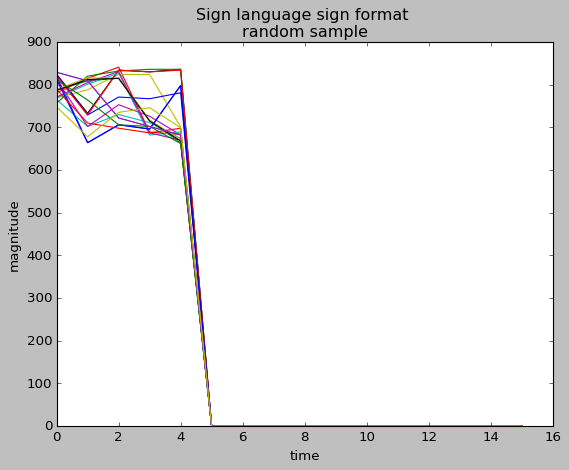

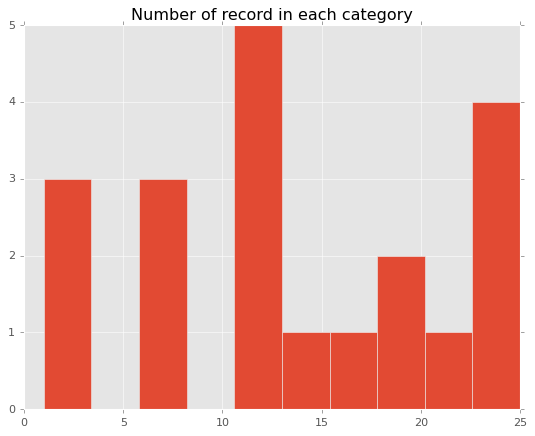

In [33]:
# take a random distribution
sample = mit_test_data.sample(20)

# remove the target column
sampleX = sample.iloc[:,sample.columns != 16]

import matplotlib.pyplot as plt

plt.style.use('classic')

# plt samples
for index, row in sampleX.iterrows():
    plt.plot(np.array(range(0,16 )) ,row)

plt.xlabel("time")
plt.ylabel("magnitude")
plt.title("Sign language sign format \nrandom sample")

plt.show()

plt.style.use("ggplot")

plt.title("Number of record in each category")

plt.hist(sample.iloc[:,sample.columns == 16].transpose())
plt.show()

In [34]:
print("Train data")
print("Type\tCount")
print((mit_train_data[4]).value_counts())
print("-------------------------")
print("Test data")
print("Type\tCount")
print((mit_test_data[4]).value_counts())

Train data
Type	Count
835    2323
836    2272
834    2239
697    1912
696    1909
       ... 
635       5
633       5
636       4
634       2
842       2
Name: 4, Length: 210, dtype: int64
-------------------------
Test data
Type	Count
836    21
682    16
691     9
701     9
753     9
       ..
685     1
703     1
649     1
658     1
693     1
Name: 4, Length: 66, dtype: int64


In [35]:
# randomly sampling from each class
classes=mit_train_data.groupby(16,group_keys=False).apply(lambda mit_train_data : mit_train_data.sample(1))
# peek on classes
print (classes)

         0    1    2    3    4   5   6   7   8   9     10    11    12    13  \
122983  800  671  717  716  684   0   0   1   0   0  0.95  0.37  0.13 -0.97   
75326   769  828  836  838  836   0   0   1   0   0  0.97  0.36 -0.01  0.34   
48089   797  718  771  783  803   0   0   1   0   0  0.36  0.59  0.67 -2.37   
38967   770  817  751  743  762   0   1   0   0   0  0.56  0.73  0.36 -0.61   
81876   765  664  721  709  716   0   0   1   0   0  0.93  0.29  0.28 -3.10   
41758   807  712  820  831  830   1   0   1   0   0  0.54  0.67  0.46 -2.39   
34113   805  748  717  700  679   0   0   1   0   0  0.18  0.95 -0.29 -0.79   
125976  783  812  828  740  730   0   0   1   0   0 -0.20  0.95  0.07 -2.25   
85348   794  687  735  754  837   0   1   1   0   0  1.01  0.13  0.13 -3.10   
83115   816  814  838  837  832   0   0   1   0   0  0.70  0.43  0.54 -0.33   
72199   801  821  815  738  681   0   0   1   0   0  0.86  0.43  0.27 -2.12   
28094   839  826  752  735  675   0   0   0   0   0 

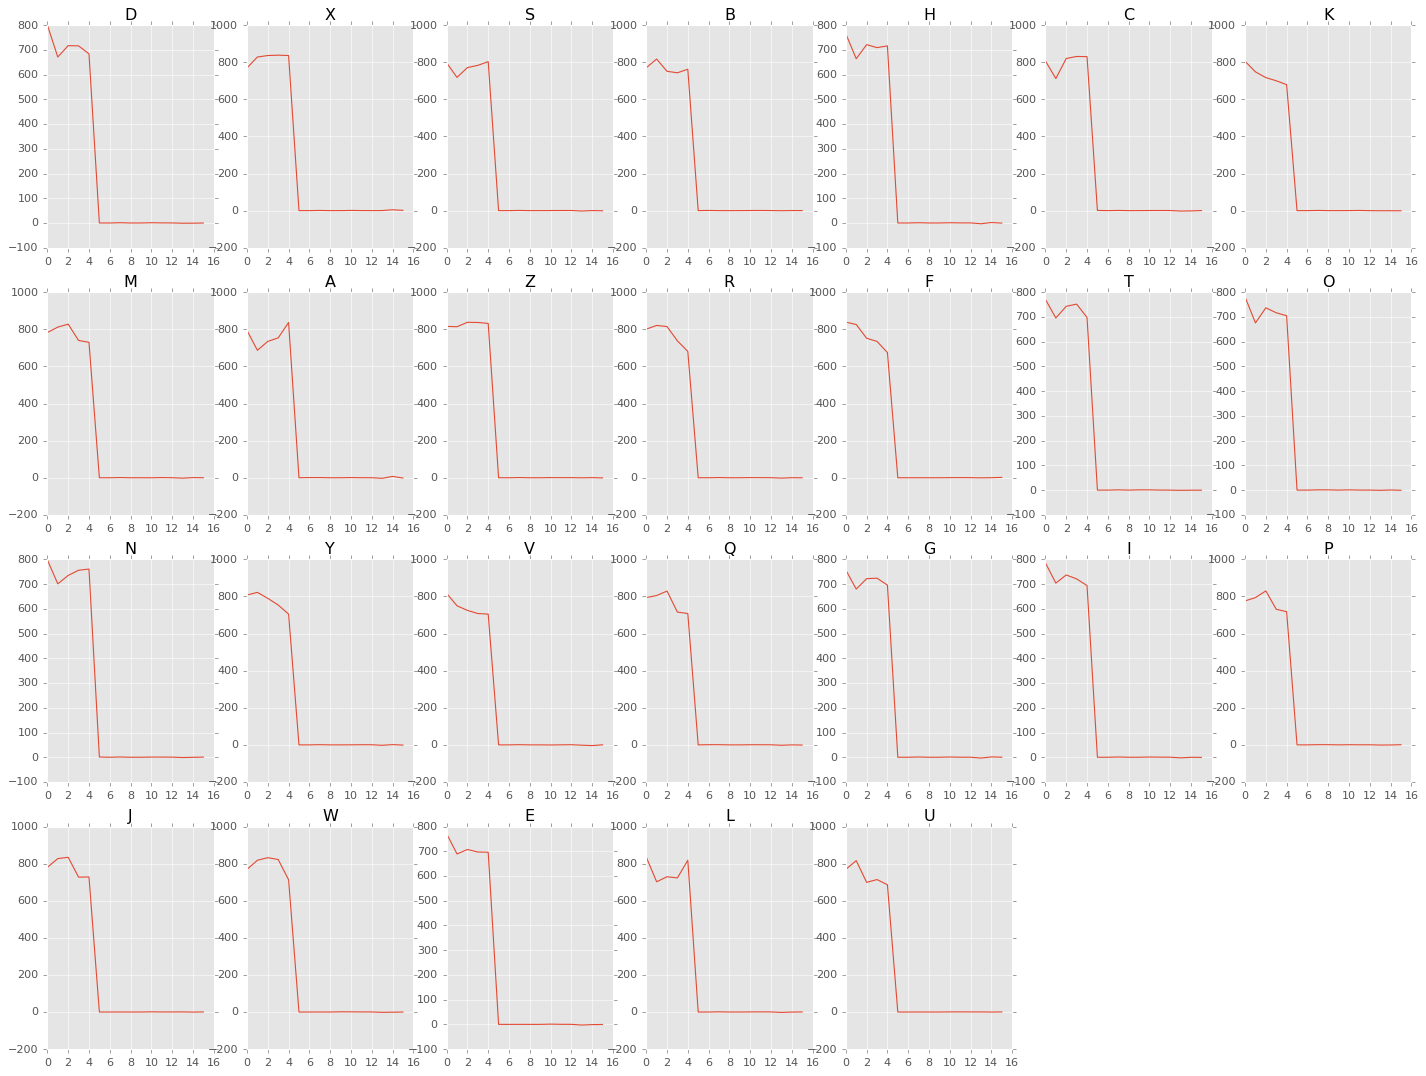

In [36]:
# plotting classes SLR 
plt.figure(figsize=(22,16))
# D
plt.subplot(4, 7, 1)  
plt.plot(classes.iloc[0,:16])
plt.title('D')
# X
plt.subplot(4,7, 2)  
plt.plot(classes.iloc[1,:16])
plt.title('X')
# S
plt.subplot(4, 7, 3)  
plt.plot(classes.iloc[2,:16])
plt.title('S')
#B
plt.subplot(4, 7, 4)  
plt.plot(classes.iloc[3,:16])
plt.title('B')
# H
plt.subplot(4, 7, 5)  
plt.plot(classes.iloc[4,:16])
plt.title('H')
# C
plt.subplot(4, 7, 6)  
plt.plot(classes.iloc[5,:16])
plt.title('C')

# K
plt.subplot(4, 7, 7)  
plt.plot(classes.iloc[6,:16])
plt.title('K')

# M
plt.subplot(4, 7, 8)  
plt.plot(classes.iloc[7,:16])
plt.title('M')

# A
plt.subplot(4, 7, 9)  
plt.plot(classes.iloc[8,:16])
plt.title('A')

# Z
plt.subplot(4, 7, 10)  
plt.plot(classes.iloc[9,:16])
plt.title('Z')

# R
plt.subplot(4, 7, 11)  
plt.plot(classes.iloc[10,:16])
plt.title('R')

# F
plt.subplot(4, 7, 12)  
plt.plot(classes.iloc[11,:16])
plt.title('F')

# T
plt.subplot(4, 7, 13)  
plt.plot(classes.iloc[12,:16])
plt.title('T')

# O
plt.subplot(4, 7, 14)  
plt.plot(classes.iloc[13,:16])
plt.title('O')

# N
plt.subplot(4, 7, 15)  
plt.plot(classes.iloc[14,:16])
plt.title('N')

# Y
plt.subplot(4, 7, 16)  
plt.plot(classes.iloc[15,:16])
plt.title('Y')

# V
plt.subplot(4, 7, 17)  
plt.plot(classes.iloc[16,:16])
plt.title('V')

# Q
plt.subplot(4, 7, 18)  
plt.plot(classes.iloc[17,:16])
plt.title('Q')

# G
plt.subplot(4, 7, 19)  
plt.plot(classes.iloc[18,:16])
plt.title('G')

# I
plt.subplot(4, 7, 20)  
plt.plot(classes.iloc[19,:16])
plt.title('I')

# P
plt.subplot(4, 7, 21)  
plt.plot(classes.iloc[20,:16])
plt.title('P')

# J
plt.subplot(4, 7, 22)  
plt.plot(classes.iloc[21,:16])
plt.title('J')

# W
plt.subplot(4, 7, 23)  
plt.plot(classes.iloc[22,:16])
plt.title('W')

# E
plt.subplot(4, 7, 24)  
plt.plot(classes.iloc[23,:16])
plt.title('E')

# L
plt.subplot(4, 7, 25)  
plt.plot(classes.iloc[24,:16])
plt.title('L')

# U
plt.subplot(4, 7, 26)  
plt.plot(classes.iloc[25,:16])
plt.title('U')



# show plot
plt.show()

In [37]:
from keras.utils import to_categorical

print("--- X ---")
X = mit_train_data.loc[:, mit_train_data.columns != 16]
print(X.head())
print(X.info())

print("--- Y ---")
y = mit_train_data.loc[:, mit_train_data.columns == 16]
y = to_categorical(y)

print("--- testX ---")
testX = mit_test_data.loc[:, mit_test_data.columns != 16]
print(testX.head())
print(testX.info())

print("--- testy ---")
testy = mit_test_data.loc[:, mit_test_data.columns == 16]
testy = to_categorical(testy)

--- X ---
    0    1    2    3    4   5   6   7   8   9     10    11    12    13    14  \
0  783  686  734  731  693   0   0   1   1   0  1.01  0.19  0.00 -1.89 -1.23   
1  783  688  735  731  693   0   0   1   1   0  1.01  0.20  0.00 -2.74 -1.66   
2  783  688  735  731  693   0   0   1   1   0  1.02  0.20  0.01 -1.94  0.18   
3  783  687  735  732  694   0   0   1   1   0  1.01  0.19  0.01 -1.74 -0.60   
4  784  688  736  732  694   0   0   1   1   0  1.02  0.20  0.01 -0.64  0.26   

     15  17  18  
0  0.18   1   1  
1 -1.26   1   1  
2  0.18   1   1  
3 -0.08   1   1  
4 -0.01   1   1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130000 entries, 0 to 129999
Data columns (total 18 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       130000 non-null  int64  
 1   1       130000 non-null  int64  
 2   2       130000 non-null  int64  
 3   3       130000 non-null  int64  
 4   4       130000 non-null  int64  
 5   5       130000 non-

In [38]:
X=mit_train_data.iloc[:,:16].values
testX=mit_test_data.iloc[:,:16].values
#for i in range(len(X_train)):
#    X_train[i,:16]= add_gaussian_noise(X_train[i,:16])
X1 = X.reshape(len(X), X.shape[1],1)
testX1 = testX.reshape(len(testX),testX.shape[1],1)

In [39]:
print('The one hot label is:', y[1])

The one hot label is: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]


In [40]:
print('The one hot label is:', testy[1])

The one hot label is: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]


In [41]:
from keras.models import Sequential
from keras.layers import Dense,MaxPool1D , Dropout, Flatten, Conv2D, MaxPooling1D,Conv1D, MaxPooling2D,AveragePooling1D,GlobalAveragePooling1D
from keras.layers import Dropout
from keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout
from keras.layers import Input
from keras.models import Model
from keras.layers import BatchNormalization
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [42]:
model = Sequential()

model.add(Conv1D(filters=512, kernel_size=3, activation='LeakyReLU', padding='same', input_shape=(X1.shape[1],1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=(2), strides=(2)))
model.add(Dropout(0.6))

model.add(Conv1D(filters=512, kernel_size=2, activation='LeakyReLU', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=(2), strides=(2)))
model.add(Dropout(0.5))

model.add(Conv1D(filters=512, kernel_size=3, activation='LeakyReLU', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=(2), strides=(2)))
model.add(Dropout(0.4))

#model.add(Conv1D(filters=512, kernel_size=2, activation='relu', padding='same'))
#model.add(BatchNormalization())
#model.add(MaxPooling1D(pool_size=(2), strides=(2)))
#model.add(Dropout(0.25))
#model.add(GlobalAveragePooling1D())

model.add(Flatten())
model.add(Dense(512, activation='LeakyReLU'))
model.add(Dropout(0.6))
model.add(Dense(256, activation='LeakyReLU'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='LeakyReLU'))
model.add(Dropout(0.4))
#model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.6))
#model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.5))

model.add(Dense(27, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy']) 
random_state =0

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 16, 512)           2048      
                                                                 
 batch_normalization_3 (Batc  (None, 16, 512)          2048      
 hNormalization)                                                 
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 8, 512)           0         
 1D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 8, 512)            0         
                                                                 
 conv1d_4 (Conv1D)           (None, 8, 512)            524800    
                                                                 
 batch_normalization_4 (Batc  (None, 8, 512)          

In [44]:
def evaluate_model(history,testX1,testy,model):
    scores = model.evaluate((testX1),testy, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    
    print(history)
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    
    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model- Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
    target_names=['0','1','2','3','4']
    
    y_true=[]
    for element in testy:
        y_true.append(np.argmax(element))
    prediction_proba=model.predict(testX1)
    prediction=np.argmax(prediction_proba,axis=1)
    cnf_matrix = confusion_matrix(y_true, prediction)

In [45]:
history = model.fit(X1, y, batch_size=512, epochs=100,   validation_data=(testX1,testy))


Epoch 1/100
254/254 [==============================] - 9s 30ms/step - loss: 3.0506 - accuracy: 0.1123 - val_loss: 1.8957 - val_accuracy: 0.3500
Epoch 2/100
254/254 [==============================] - 7s 29ms/step - loss: 1.7298 - accuracy: 0.3624 - val_loss: 0.9500 - val_accuracy: 0.5346
Epoch 3/100
254/254 [==============================] - 7s 29ms/step - loss: 1.1598 - accuracy: 0.5368 - val_loss: 0.8040 - val_accuracy: 0.6462
Epoch 4/100
254/254 [==============================] - 7s 29ms/step - loss: 0.9716 - accuracy: 0.6001 - val_loss: 0.6378 - val_accuracy: 0.7962
Epoch 5/100
254/254 [==============================] - 7s 29ms/step - loss: 0.8844 - accuracy: 0.6287 - val_loss: 0.6674 - val_accuracy: 0.6769
Epoch 6/100
254/254 [==============================] - 7s 29ms/step - loss: 0.8256 - accuracy: 0.6495 - val_loss: 0.6721 - val_accuracy: 0.7000
Epoch 7/100
254/254 [==============================] - 8s 30ms/step - loss: 0.7949 - accuracy: 0.6630 - val_loss: 0.5621 - val_accuracy:

In [46]:
#print('Validation_Accuracy =')
Acc=model.evaluate(testX1,testy,verbose=0)
print("Validation_Accuracy = %.2f%%" % (Acc[1]*100))

Validation_Accuracy = 93.08%


In [47]:
#print('Training_Accuracy =')
Acc1=model.evaluate(X1,y,verbose=0)
print("Training_Accuracy = %.2f%%" % (Acc1[1]*100))

Training_Accuracy = 95.49%


Accuracy: 93.08%


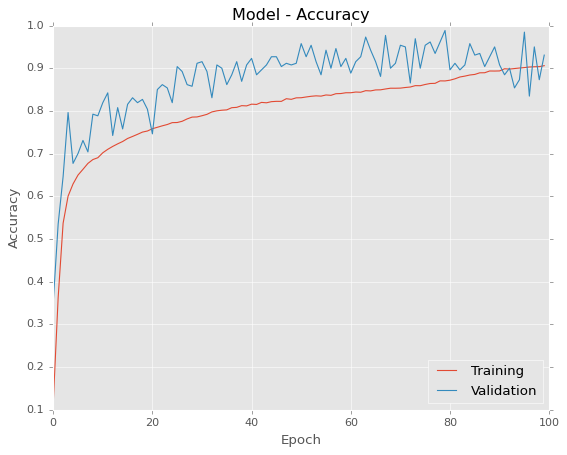

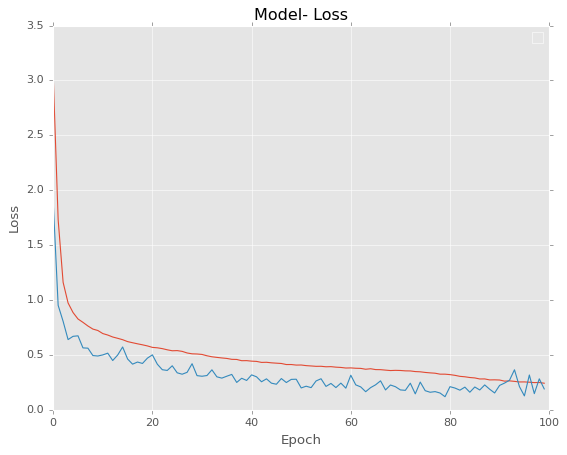

9/9 [==============================] - 0s 4ms/step


In [49]:
evaluate_model(history,testX1,testy,model)
y_pred=model.predict(testX1)

Accuracy: 95.49%


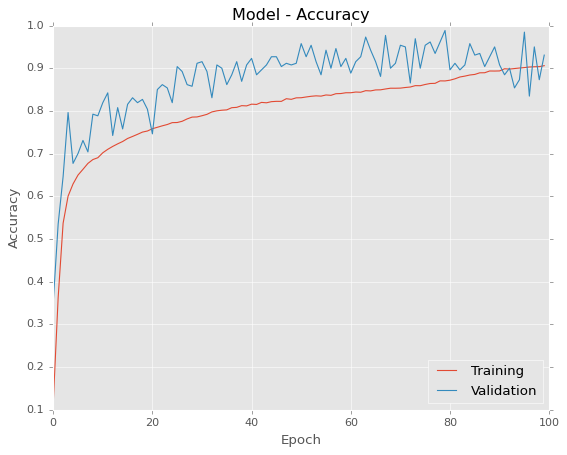

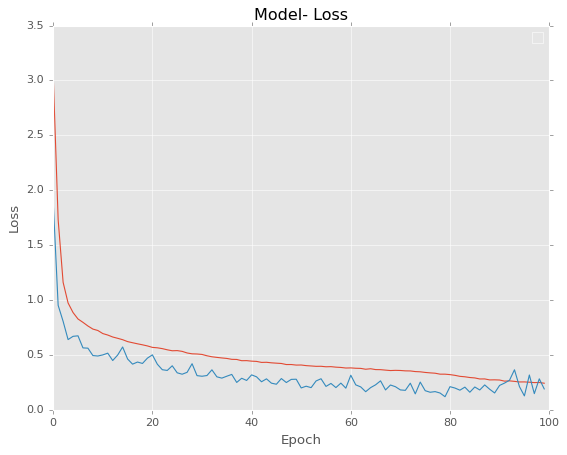

4063/4063 [==============================] - 10s 2ms/step


In [50]:
evaluate_model(history,X1,y,model)
y_pred=model.predict(X1)

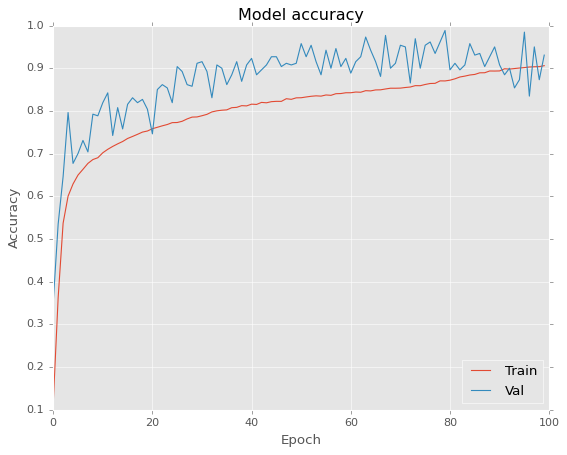

In [51]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


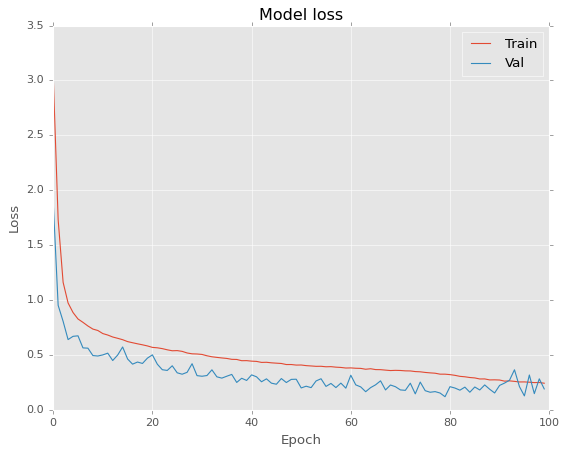

In [52]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


Normalized confusion matrix


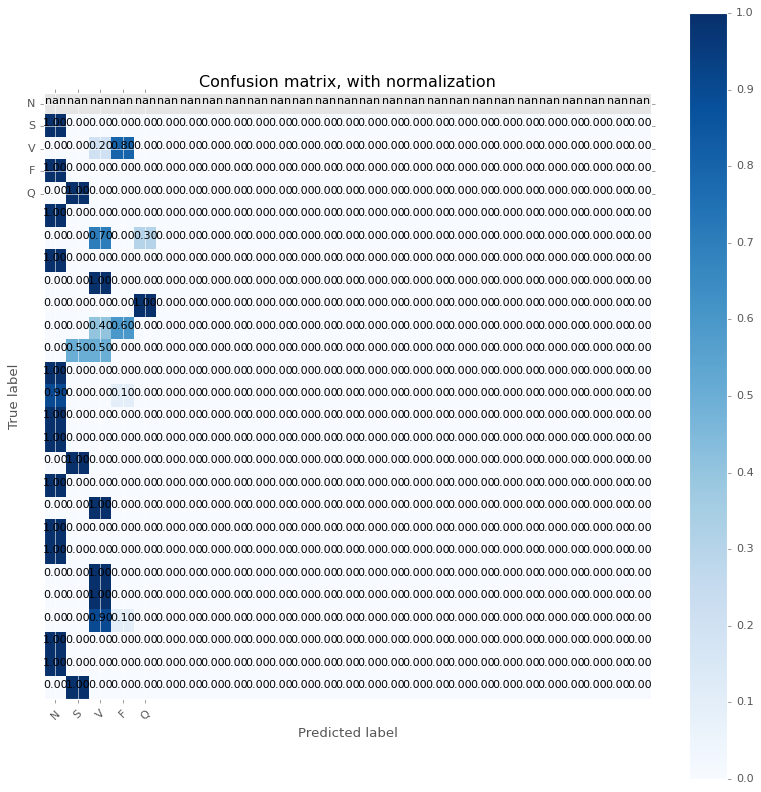

In [53]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(testy.argmax(axis=1), testX1.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'],normalize=True,
                      title='Confusion matrix, with normalization')
plt.show()